***
***

<h1>  Course Case - Apprentice Chef </h1>
<h2> Regression Based Analysis </h2>
Estelle Eteki - MSBA 3


Apprentice Chef, Inc is a company providing to busy professionals a wide-selection of daily prepared gourmet meals delivered to your door. <br>
The company realized that 90% of their revenues are from customers that have been ordering meals for 12 months or less.
The goal of the project is to help the company to understand what revenue each customer generate within their first year of orders.
    
***
***

<h3>Part I - DataSet Exploration</h3>

Import the packages for data science essientials, graphical output and regression modelling. <br>
* pandas 
* seaborn
* matplotlib.pyplot
* statsmodels.formula.api
* train_test_split from sklearn.model_selection
* LinearRegression from   sklearn.linear_model 
<br>

And load the file 'Apprentice_Chef_Dataset.xlsx' into Python, and display the first five rows.


In [1]:
# importing libraries
import pandas                    as     pd # data science essentials
import matplotlib.pyplot         as     plt # essential graphical output
import seaborn                   as     sns # enhanced graphical output
import statsmodels.formula.api   as     smf # regression modeling
from   sklearn.model_selection   import train_test_split # train/test split
from   sklearn.linear_model      import LinearRegression # linear regression (scikit-learn)
from   sklearn.linear_model      import Lasso # lasso model (scikit-learn)
from   sklearn.ensemble          import GradientBoostingRegressor # Gradient Boosting Regressor (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)

apprentice.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


***
<br>

Display information about each variable, such as types and number of non-missing values.

In [16]:
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

***
<br>
Import the dictionary dataset and display to get a meaning of each column in the 'Apprentice_Chef_Dataset.xlsx' dataset.

In [17]:
#read the file into Python
dictionary = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')

dictionary

,Column,Data Type,Description
0,REVENUE,float,Total revenue generated over the first year of...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...
2,NAME,string,Full name of customer (collected upon initial ...
3,EMAIL,string,Email of customer (collected upon initial regi...
4,FIRST_NAME,string,First name of customer (collected upon initial...
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...


*** 
<br>
Describe each quantitative columns with descriptive statistics (rounded to 2).

In [18]:
apprentice.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,35.411100,150.556578,4.436793,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,26.577927,49.447180,1.550972,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,30.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,60.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,90.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


***
<br>
<h3> Part II - Data Types </h3>

Display quantile for quantitative column.

In [19]:
apprentice.loc[:, :].quantile([0.20,
                               0.40,
                               0.60,
                               0.80,
                               1.00])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,10.0,108.6,3.0,0.0,2.0,12.0,0.0
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,1.0,5.0,1.0,5.0,0.0,2.0,0.0,0.0,20.0,134.4,4.0,0.0,3.0,13.0,0.0
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,1.0,6.0,2.0,10.0,1.0,3.0,0.0,0.0,40.0,156.7,5.0,1.0,3.0,14.0,28.0
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,1.0,6.0,2.0,16.0,3.0,5.0,1.0,0.0,70.0,183.8,6.0,1.0,3.0,16.0,210.0
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,1.0,7.0,3.0,52.0,9.0,19.0,1.0,1.0,90.0,564.2,11.0,3.0,5.0,19.0,1600.0


*** 
Print different column

In [20]:
apprentice['EMAIL']

0                      addam.osgrey@passport.com
1                        aegon.blackfyre@jnj.com
2            aegon.frey.(son.of.aenys)@gmail.com
3       aegon.targaryen.(son.of.rhaegar)@ibm.com
4              aegon.v.targaryen@goldmansacs.com
                          ...                   
1941                            yandry@yahoo.com
1942                            yorkel@gmail.com
1943                       young.henly@gmail.com
1944                       ysilla@protonmail.com
1945                    ysilla.royce@hotmail.com
Name: EMAIL, Length: 1946, dtype: object

***
<br>
Make assumptions about the type of each variable, whether it is Continuous, Binary, Discrete or Categorical.

In [ ]:
"""
Categorical

EMAIL (if classified by the domain)
MEDIAN_MEAL_RATING (could be here)

Binary

TASTES_AND_PREFERENCES
CROSS_SELL_SUCCESS
PACKAGE_LOCKER
REFRIGERATED_LOCKER
MOBILE_NUMBER


Discrete

MASTER_CLASSES_ATTENDED
MEDIAN_MEAL_RATING
CONTACTS_W_CUSTOMER_SERVICE (could be here)
PRODUCT_CATEGORIES_VIEWED (could be here)
MOBILE_LOGINS (could be here)
PC_LOGINS (could be here)


Continuous or Interval

REVENUE
AVG_PREP_VID_TIME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
PC_LOGINS
FOLLOWED_RECOMMENDATIONS_PCT
AVG_CLICKS_PER_VISIT
TOTAL_PHOTOS_VIEWED
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
LARGEST_ORDER_SIZE

"""

***
<br>
<h3> Part III - Feature Engineering </h3>

***
<br>
Splitting features into domain for a better unterstanding and future prediction.

In [2]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows(): #each individual record
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
apprentice = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# renaming column to concatenate
email_df.columns = ['name' , 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']],
                   axis = 1)


In [3]:
# email domain types
professional_email_domains = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com',
                                 '@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org',
                                 '@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                                 '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com',
                                 '@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if '@'+ domain in professional_email_domains:
            placeholder_lst.append('Professional')
            
        elif '@'+ domain in personal_email_domains:
            placeholder_lst.append('Personal')
            
        elif '@'+ domain in junk_email_domains:
            placeholder_lst.append('Junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
apprentice['EMAIL_DOMAIN'] = pd.Series(placeholder_lst)


***
<br>
Develop new features to get per customer account the following
* the percentage of unique meals purchased
* the percentage of late deliveries
* the average weekly order

In [4]:
#Creating % of late deliveries 

# placeholder for 'pct_late' feature
apprentice['pct_late'] = 0

#fill in based on the value in 'LATE_DELIVERIES' and 'TOTAL_MEALS_ORDERED'
for index, col in apprentice.iterrows():
    apprentice.loc[index, 'pct_late'] = (apprentice.loc[index, 'LATE_DELIVERIES'] / 
                                         apprentice.loc[index, 'TOTAL_MEALS_ORDERED']).round(3)


In [5]:
#Creating % of unique purch out of total meals ordered

# placeholder for 'pct_unique' feature
apprentice['pct_unique'] = 0

#fill in based on the value in 'UNIQUE_MEALS_PURCH' and 'TOTAL_MEALS_ORDERED'
for index, col in apprentice.iterrows():
    apprentice.loc[index, 'pct_unique'] = (apprentice.loc[index, 'UNIQUE_MEALS_PURCH'] / 
                                       apprentice.loc[index, 'TOTAL_MEALS_ORDERED']).round(3)



***
<br>
Display the dataset to make sure the new features are effective

In [12]:
apprentice

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,pct_late,pct_unique
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0,Junk,0.017,0.034
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90,Professional,0.091,0.068
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0,Personal,0.000,0.026
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0,Professional,0.053,0.039
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253,Professional,0.062,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1515.0,0,Yandry,yandry@yahoo.com,Yandry,Yandry,38,9,6,9,118.50,1,1,0,1,6,2,9,4,3,0,0,20,117.7,4,0,3,12,98,Personal,0.079,0.237
1942,1432.0,0,Yorkel,yorkel@gmail.com,Yorkel,Yorkel,47,8,4,8,105.30,0,0,0,1,5,3,6,0,2,0,0,20,98.1,3,0,3,13,0,Personal,0.043,0.170
1943,623.0,0,Young Henly,young.henly@gmail.com,Young,Henly,14,6,11,1,90.81,1,1,0,1,6,1,12,0,1,0,0,30,86.4,3,1,2,18,0,Personal,0.071,0.429
1944,899.0,0,Ysilla,ysilla@protonmail.com,Ysilla,Ysilla,15,4,12,6,97.22,1,0,0,0,6,2,52,4,3,0,0,20,86.9,1,0,2,17,0,Personal,0.200,0.267


***
<br> 
Now, we are going to engineer some feautres to strengthen our prediction model.

<h4> Outlier Analysis </h4><br>

The following graph are plotting the distribution of each column and the images file are saved in the working directory

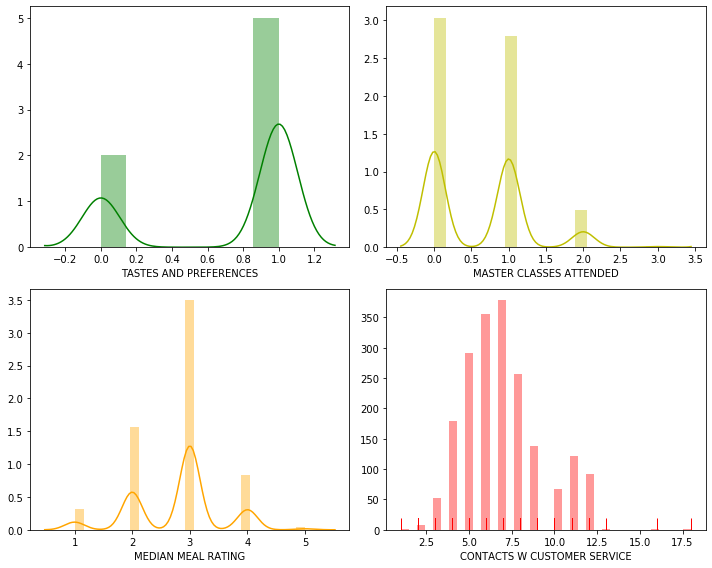

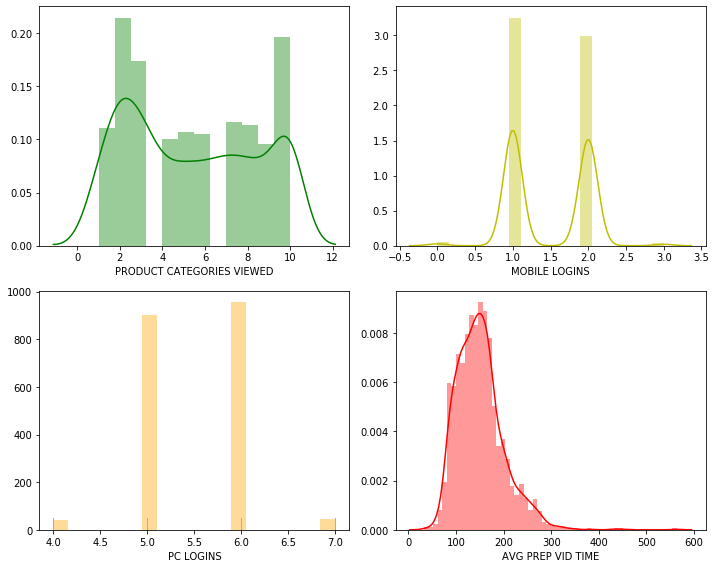

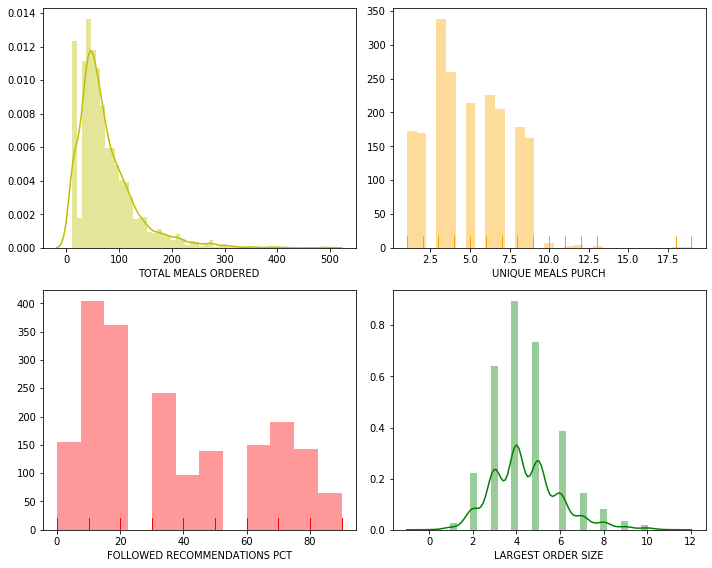

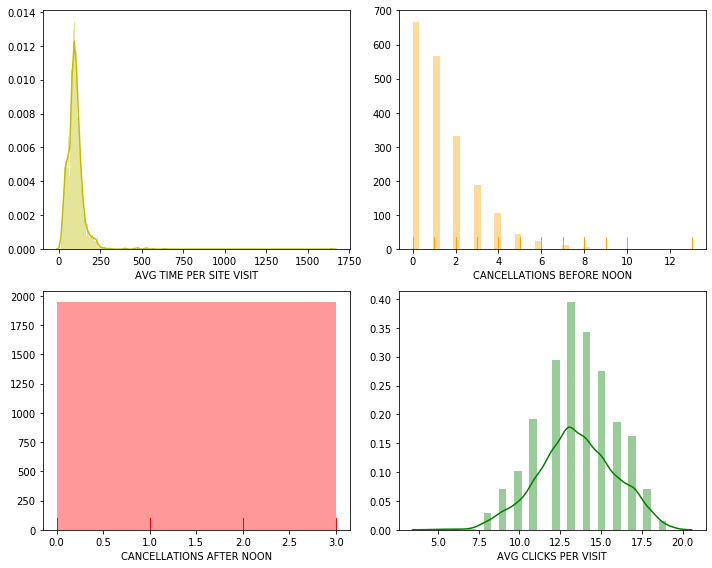

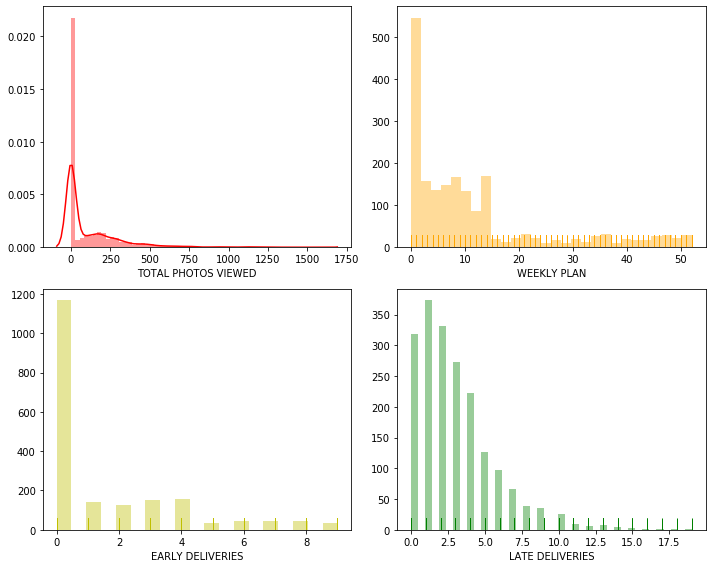

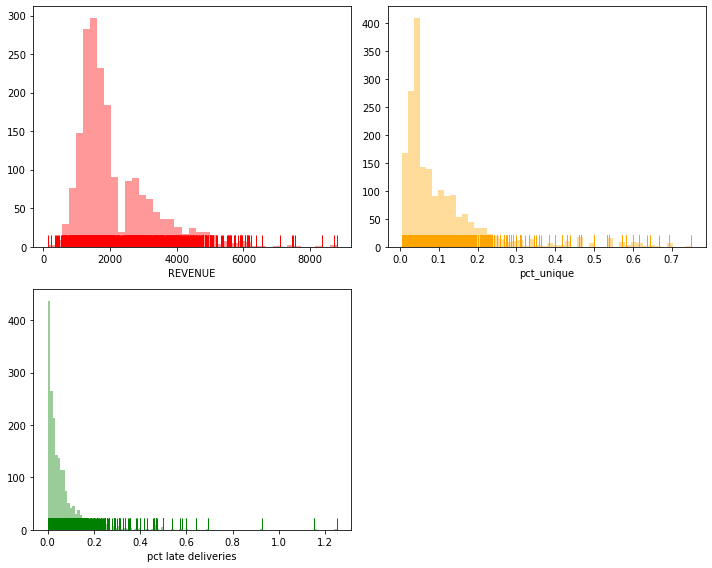

In [41]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TASTES AND PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('MEDIAN MEAL RATING')

########################
plt.subplot(2, 2, 4)
sns.distplot(apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS W CUSTOMER SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['PC_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVG PREP VID TIME')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE MEALS PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST ORDER SIZE')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['CANCELLATIONS_BEFORE_NOON'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['CANCELLATIONS_AFTER_NOON'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('CANCELLATIONS AFTER NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG CLICKS PER VISIT')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             #kde   = False,
             #rug   = True,
             color = 'r')
plt.xlabel('TOTAL PHOTOS VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('WEEKLY PLAN')

########################
           
plt.subplot(2, 2, 3)
sns.distplot(apprentice['EARLY_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('EARLY DELIVERIES')

plt.subplot(2, 2, 4)
sns.distplot(apprentice['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('LATE DELIVERIES')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(apprentice['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(apprentice['pct_unique'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('pct_unique')

########################

plt.subplot(2, 2, 3)
sns.distplot(apprentice['pct_late'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('pct late deliveries')
plt.tight_layout()
plt.savefig('Apprentice Data Histograms 6 of 6.png')
plt.show()



***
<br>
Based on the distribution, outlier variables are going to be created for the following columns.

In [6]:
# Defining the outliers for the variables

pct_late_hi                    = 0.15

Masters_classes_attended_hi    = 2.0

Contacts_W_customer_service_lo = 5.0 
Contacts_W_customer_service_hi = 10

Avg_Prep_Vid_Time_lo           = 60 
Avg_Prep_Vid_Time_hi           = 220

Total_Meals_Ordered_hi         = 230

Unique_Meals_Purch_hi          = 5

Largest_Order_size_lo          = 2
Largest_Order_size_hi          = 10

Avg_Time_Per_Site_Visit_hi     = 250

Cancellations_Before_Noon_hi   = 4

Avg_Clicks_Per_Visit_lo        = 12
Avg_Clicks_Per_Visit_hi        = 16

Total_Photos_Viewed_hi         = 280

Pc_Logins_lo                   = 5
Pc_Logins_hi                   = 6

pct_unique_hi                  = 0.25

Revenue_hi                     = 3050


##############################################
## Feature Engineering (outlier thresholds) ##
##############################################

# developing features (columns) for outliers

# Pct late deliveries
apprentice['out_pct_late'] = 0
condition_hi = apprentice.loc[0:,'out_pct_late'][apprentice['pct_late'] > pct_late_hi]

apprentice['out_pct_late'].replace(to_replace = condition_hi,
                                   value      = 1,
                                   inplace    = True)

# Masters Classes Attended
apprentice['out_Masters_Classes_Attended'] = 0
condition_hi = apprentice.loc[0:,'out_Masters_Classes_Attended'][apprentice['MASTER_CLASSES_ATTENDED'] > Masters_classes_attended_hi]

apprentice['out_Masters_Classes_Attended'].replace(to_replace = condition_hi,
                                                   value      = 1,
                                                   inplace    = True)

# Contacts W Customer Service
apprentice['out_Customers_W_Customer_service'] = 0
condition_hi = apprentice.loc[0:,'out_Customers_W_Customer_service'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] > Contacts_W_customer_service_hi]
condition_lo = apprentice.loc[0:,'out_Customers_W_Customer_service'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] < Contacts_W_customer_service_lo]

apprentice['out_Customers_W_Customer_service'].replace(to_replace = condition_hi,
                                                       value      = 1,
                                                       inplace    = True)

apprentice['out_Customers_W_Customer_service'].replace(to_replace = condition_lo,
                                                       value      = 1,
                                                       inplace    = True)

# Avg Prep Vid Time
apprentice['out_Avg_Prep_Vid_Time'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Prep_Vid_Time'][apprentice['AVG_PREP_VID_TIME'] > Avg_Prep_Vid_Time_hi]
condition_lo = apprentice.loc[0:,'out_Avg_Prep_Vid_Time'][apprentice['AVG_PREP_VID_TIME'] < Avg_Prep_Vid_Time_lo]

apprentice['out_Avg_Prep_Vid_Time'].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)

apprentice['out_Avg_Prep_Vid_Time'].replace(to_replace = condition_lo,
                                            value      = 1,
                                            inplace    = True)

# Total Meals Ordered
apprentice['out_Total_Meals_Ordered'] = 0
condition_hi = apprentice.loc[0:,'out_Total_Meals_Ordered'][apprentice['TOTAL_MEALS_ORDERED'] > Total_Meals_Ordered_hi]

apprentice['out_Total_Meals_Ordered'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# Unique Meals Purch
apprentice['out_Unique_Meals_Purch'] = 0
condition_hi = apprentice.loc[0:,'out_Unique_Meals_Purch'][apprentice['UNIQUE_MEALS_PURCH'] > Unique_Meals_Purch_hi]

apprentice['out_Unique_Meals_Purch'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# Largest Order Size
apprentice['out_Largest_Order_Size'] = 0
condition_hi = apprentice.loc[0:,'out_Largest_Order_Size'][apprentice['LARGEST_ORDER_SIZE'] > Largest_Order_size_hi]
condition_lo = apprentice.loc[0:,'out_Largest_Order_Size'][apprentice['LARGEST_ORDER_SIZE'] < Largest_Order_size_lo]

apprentice['out_Largest_Order_Size'].replace(to_replace = condition_hi,
                                             value      = 1,
                                             inplace    = True)

# Avg Time Per Site Visit
apprentice['out_Avg_Time_Per_Site_Visit'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Time_Per_Site_Visit'][apprentice['AVG_TIME_PER_SITE_VISIT'] > Avg_Time_Per_Site_Visit_hi]

apprentice['out_Avg_Time_Per_Site_Visit'].replace(to_replace = condition_hi,
                                                  value      = 1,
                                                  inplace    = True)

# Cancellations Before Noon
apprentice['out_Cancellations_Before_Noon'] = 0
condition_hi = apprentice.loc[0:,'out_Cancellations_Before_Noon'][apprentice['CANCELLATIONS_BEFORE_NOON'] > Cancellations_Before_Noon_hi]

apprentice['out_Cancellations_Before_Noon'].replace(to_replace = condition_hi,
                                                    value      = 1,
                                                    inplace    = True)

# Avg Clicks Per Visit
apprentice['out_Avg_Clicks_Per_Visit'] = 0
condition_hi = apprentice.loc[0:,'out_Avg_Clicks_Per_Visit'][apprentice['AVG_CLICKS_PER_VISIT'] > Avg_Clicks_Per_Visit_hi]
condition_lo = apprentice.loc[0:,'out_Avg_Clicks_Per_Visit'][apprentice['AVG_CLICKS_PER_VISIT'] < Avg_Clicks_Per_Visit_lo]

apprentice['out_Avg_Clicks_Per_Visit'].replace(to_replace = condition_hi,
                                               value      = 1,
                                               inplace    = True)

apprentice['out_Avg_Clicks_Per_Visit'].replace(to_replace = condition_lo,
                                               value      = 1,
                                               inplace    = True)

# Total Photos Viewed
apprentice['out_Total_Photos_Viewed'] = 0
condition_hi = apprentice.loc[0:,'out_Total_Photos_Viewed'][apprentice['TOTAL_PHOTOS_VIEWED'] > Total_Photos_Viewed_hi]

apprentice['out_Total_Photos_Viewed'].replace(to_replace = condition_hi,
                                              value      = 1,
                                              inplace    = True)

# PC Logins
apprentice['out_Pc_Logins'] = 0
condition_hi = apprentice.loc[0:,'out_Pc_Logins'][apprentice['PC_LOGINS'] > Pc_Logins_hi]
condition_lo = apprentice.loc[0:,'out_Pc_Logins'][apprentice['PC_LOGINS'] < Pc_Logins_lo]

apprentice['out_Pc_Logins'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

apprentice['out_Pc_Logins'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Percentage of Unique Meals Purch
apprentice['out_pct_unique'] = 0
condition_hi = apprentice.loc[0:,'out_pct_unique'][apprentice['pct_unique'] > pct_unique_hi]

apprentice['out_pct_unique'].replace(to_replace = condition_hi,
                                     value      = 1,
                                     inplace    = True)

# Revenue
apprentice['out_Revenue'] = 0
condition_hi = apprentice.loc[0:,'out_Revenue'][apprentice['REVENUE'] > Revenue_hi]

apprentice['out_Revenue'].replace(to_replace = condition_hi, 
                                  value      = 1, 
                                  inplace    = True)

<h4> Trend based Features </h4><br>


The purpose is to develop thresholds at points where the trend changes. We should identify where a variable's trend changes in terms of its relationship with REVENUE. <br>

Here are some scatterplots between REVENUE and our response variable.

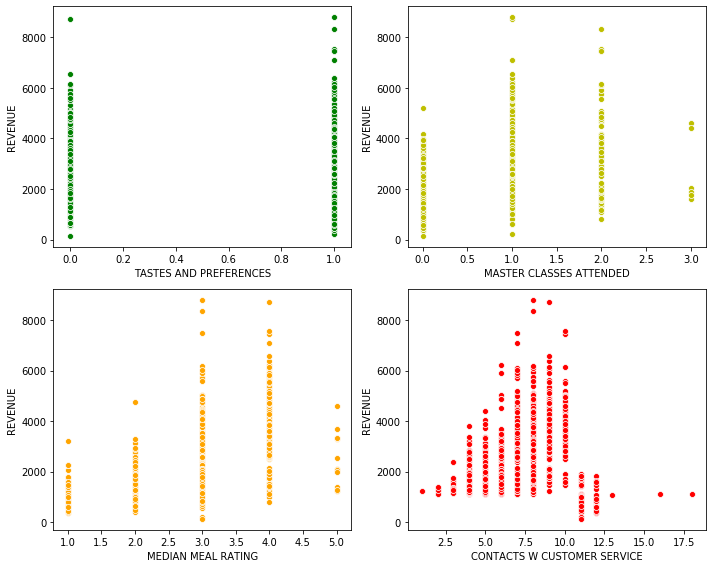

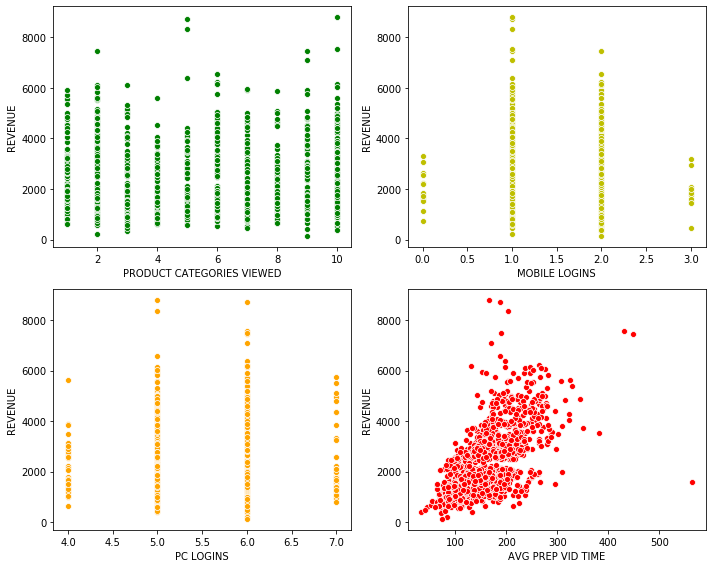

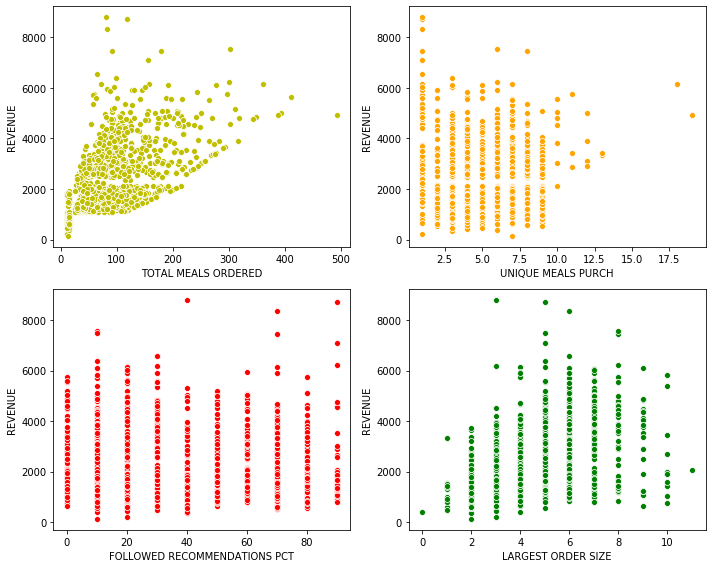

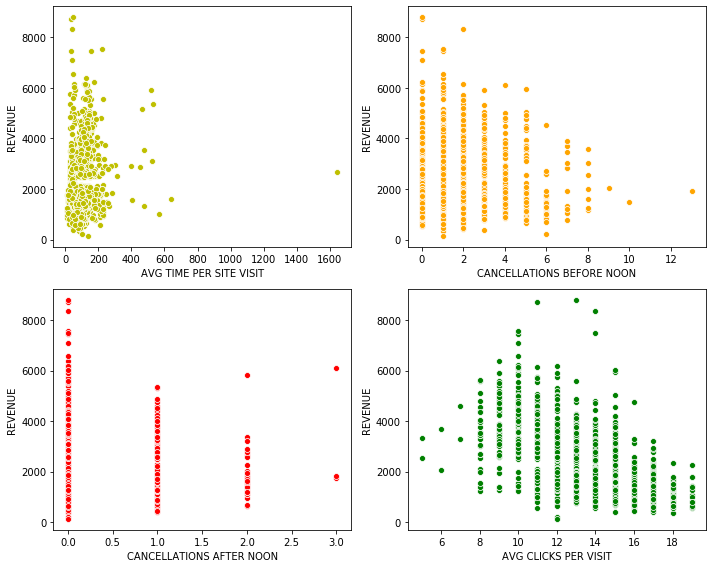

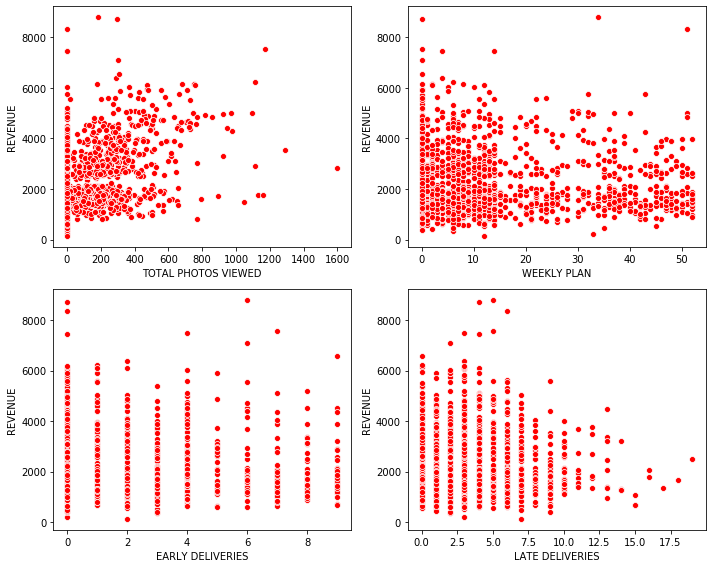

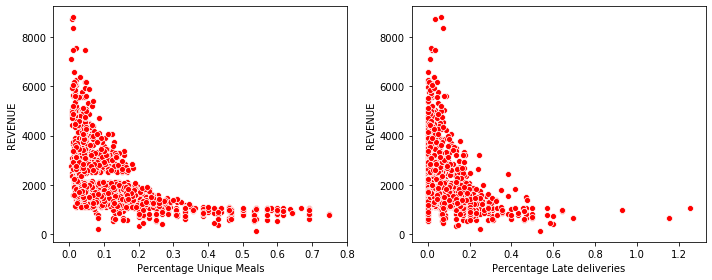

In [42]:
########################
# Visual EDA (ScatterPlots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)

sns.scatterplot(x = apprentice['TASTES_AND_PREFERENCES'],
                y = apprentice['REVENUE'],
            color = 'g')
plt.xlabel('TASTES AND PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['MASTER_CLASSES_ATTENDED'],
                y = apprentice['REVENUE'],
            color = 'y')
plt.xlabel('MASTER CLASSES ATTENDED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['MEDIAN_MEAL_RATING'],
                y = apprentice['REVENUE'],
            color = 'orange')
plt.xlabel('MEDIAN MEAL RATING')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('CONTACTS W CUSTOMER SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['PRODUCT_CATEGORIES_VIEWED'],
                y = apprentice['REVENUE'],
            color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['MOBILE_LOGINS'],
                y = apprentice['REVENUE'],
            color = 'y')
plt.xlabel('MOBILE LOGINS')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['PC_LOGINS'],
                y = apprentice['REVENUE'],
            color = 'orange')
plt.xlabel('PC LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('AVG PREP VID TIME')
plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
            color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['UNIQUE_MEALS_PURCH'],
                y = apprentice['REVENUE'],
            color = 'orange')
plt.xlabel('UNIQUE MEALS PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
            color = 'g')
plt.xlabel('LARGEST ORDER SIZE')
plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
            color = 'y')
plt.xlabel('AVG TIME PER SITE VISIT')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['CANCELLATIONS_BEFORE_NOON'],
                y = apprentice['REVENUE'],
            color = 'orange')
plt.xlabel('CANCELLATIONS BEFORE NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['CANCELLATIONS_AFTER_NOON'],
                y = apprentice['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS AFTER NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['AVG_CLICKS_PER_VISIT'],
                y = apprentice['REVENUE'],
            color = 'g')
plt.xlabel('AVG CLICKS PER VISIT')
plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('TOTAL PHOTOS VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('WEEKLY PLAN')

########################
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['EARLY_DELIVERIES'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('EARLY DELIVERIES')

plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['LATE_DELIVERIES'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('LATE DELIVERIES')
plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 5 of 6.png')
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = apprentice['pct_unique'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('Percentage Unique Meals')

########################

plt.subplot(1, 2, 2)
sns.scatterplot(x = apprentice['pct_late'],
                y = apprentice['REVENUE'],
            color = 'r')
plt.xlabel('Percentage Late deliveries')

plt.tight_layout()
plt.savefig('Apprentice Data Scatterplots 6 of 6.png')
plt.show()


The following treshlods points have been developed based in the scatterplots previously displayed.

In [7]:
# Setting trendbased tresholds

Contacts_W_Customer_Service_change_at = 10
Unique_Meals_Purch_change_at          = 7.5 
Avg_Clicks_Per_Visit_change_at        = 8

Avg_Prep_Vid_Time_change_hi           = 280
Avg_Time_Per_Site_Visit_change_hi     = 300


# developing features (columns) for tresholds

########################################
## change above threshold             ##
########################################

# Avg Time Per Visit
apprentice['change_Avg_Time_Per_Site_Visit'] = 0
condition = apprentice.loc[0:,'change_Avg_Time_Per_Site_Visit'][apprentice['AVG_TIME_PER_SITE_VISIT'] > Avg_Time_Per_Site_Visit_change_hi]

apprentice['change_Avg_Time_Per_Site_Visit'].replace(to_replace = condition,
                                                     value      = 1,
                                                     inplace    = True)

# Avg Prep Vid Time
apprentice['change_Avg_Prep_Vid_Time'] = 0
condition = apprentice.loc[0:,'change_Avg_Prep_Vid_Time'][apprentice['AVG_PREP_VID_TIME'] > Avg_Prep_Vid_Time_change_hi]

apprentice['change_Avg_Prep_Vid_Time'].replace(to_replace = condition,
                                               value      = 1,
                                               inplace    = True)

# Avg Clicks Per Visit
apprentice['change_Avg_Clicks_Per_Visit'] = 0
condition = apprentice.loc[0:,'change_Avg_Clicks_Per_Visit'][apprentice['AVG_CLICKS_PER_VISIT'] > Avg_Clicks_Per_Visit_change_at]

apprentice['change_Avg_Clicks_Per_Visit'].replace(to_replace = condition,
                                                  value      = 1,
                                                  inplace    = True)


# Contacts W Customer Service
apprentice['change_Contacts_W_Customer_Service'] = 0

condition = apprentice.loc[0:,'change_Contacts_W_Customer_Service'][apprentice['CONTACTS_W_CUSTOMER_SERVICE'] > Contacts_W_Customer_Service_change_at]

apprentice['change_Contacts_W_Customer_Service'].replace(to_replace = condition,
                                                         value      = 1,
                                                         inplace    = True)

# Unique Meals Purch
apprentice['change_Unique_Meals_Purch'] = 0

condition = apprentice.loc[0:,'change_Unique_Meals_Purch'][apprentice['UNIQUE_MEALS_PURCH'] > Unique_Meals_Purch_change_at]

apprentice['change_Unique_Meals_Purch'].replace(to_replace = condition,
                                                value      = 1,
                                                inplace    = True)



***
<br>
<h4> Encoding Categorical Data </h4>


Base on our previous analysis (the quantile table), 'MEDIAN_MEAL_RATING' is not going to be considered as categorical but discrete. The only categorical variable in the dataset is domain. 

***
<br>
Let's plot a boxplot of 'EMAIL_DOMAIN' to observe its variation.

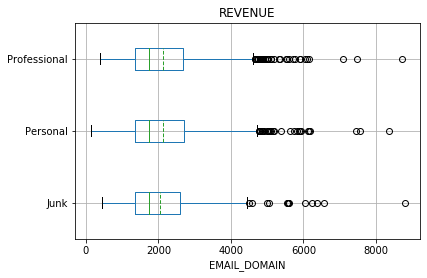

In [28]:
# defining a function for categorical boxplots

apprentice.boxplot(column        = 'REVENUE',
                   by            = 'EMAIL_DOMAIN',
                   vert          = False,
                   patch_artist  = False,
                   meanline      = True,
                   showmeans     = True)

plt.suptitle("")
plt.show()


***
<br>
Encode 'EMAIL_DOMAIN' to get dummies.

In [8]:
# one hot encoding 'EMAIL_DOMAIN'
one_hot_Domain = pd.get_dummies(apprentice['EMAIL_DOMAIN'])

# dropping 'EMAIL_DOMAIN' after it has been encoded
apprentice = apprentice.drop(['EMAIL_DOMAIN'], axis = 1)

# joining codings together
apprentice = apprentice.join([one_hot_Domain])

# drop one of the dummies ('Junk') for a better prediction.
apprentice = apprentice.drop(['Junk'], axis = 1)


***
<br> 
Get the dataset new columns.

In [30]:
apprentice.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'pct_late', 'pct_unique', 'out_pct_late', 'out_Masters_Classes_Attended', 'out_Customers_W_Customer_service', 'out_Avg_Prep_Vid_Time', 'out_Total_Meals_Ordered', 'out_Unique_Meals_Purch', 'out_Largest_Order_Size', 'out_Avg_Time_Per_Site_Visit', 'out_Cancellations_Before_Noon', 'out_Avg_Clicks_Per_Visit', 'out_Total_Photos_Viewed', 'out_Pc_Logins', 'out_pct_unique', 'out_Revenue',
   

***
<br>
Save the results.

In [31]:
# saving results
apprentice.to_excel('apprentice_feature_rich.xlsx',
                 index = False)

<h3> Part IV - Buiding a Predictive Model </h3>

***
<br> Data Dumping. Develop a correlation matrix to get the columns correlated to 'REVENUE' column. It helps us to get a sense of what might be the strongest explanatory variables.

In [32]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                               1.00
out_Revenue                           0.82
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
out_Avg_Prep_Vid_Time                 0.43
out_Total_Photos_Viewed               0.41
out_Total_Meals_Ordered               0.29
out_Avg_Clicks_Per_Visit              0.24
change_Avg_Prep_Vid_Time              0.20
AVG_TIME_PER_SITE_VISIT               0.14
CONTACTS_W_CUSTOMER_SERVICE           0.10
change_Avg_Time_Per_Site_Visit        0.07
out_Avg_Time_Per_Site_Visit           0.05
out_Masters_Classes_Attended          0.03
PRODUCT_CATEGORIES_VIEWED             0.03
MOBILE_NUMBER                         0.03
PC_LOGINS                             0.02
out_Cancellations_Before_Noon         0.02
out_Pc_Logins                         0.02
TASTES_AND_

***
<br>
From this table, we can see that the columns that are positively 'strong' (and medium) correlated to Revenue are: Average preparation video time, total meals ordered, total photos viewed, master classes attended, largest order size and the outliers of total photos viewed.
<br>
On the other hand, the columns with negative 'strong' (and medium) correlated are: average clicks per visit, percentage of unique meals and outliers of contacts with customer service.

***
<br>
Let's throw everything into a model and see how each explanatory variable performs. This is known as building a full model. <br>

Adding each variable one-by-one would be a long and tedious process. Perform these steps to speed up the process: <br><br>1. Make a copy of the housing dataset and name it housing_explanatory <br><br>2. Drop 'REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', and 'out_Revenue' from apprentice_explanatory <br><br>3. Develop a loop that will print each explanatory variable in the following format:<br>
housing['EXPLANATORY_VARIABLE'] +

In [33]:
# making a copy of APPRENTICE
apprentice_explanatory = apprentice.copy()


# dropping Cross sell success and Revenue from the explanatory variable set
apprentice_explanatory = apprentice.drop(['CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 
                                          'FIRST_NAME', 'FAMILY_NAME','REVENUE', 'out_Revenue'], axis=1)


# formatting each explanatory variable for statsmodels
for val in apprentice_explanatory:
    print(f"apprentice['{val}'] +")

apprentice['TOTAL_MEALS_ORDERED'] +
apprentice['UNIQUE_MEALS_PURCH'] +
apprentice['CONTACTS_W_CUSTOMER_SERVICE'] +
apprentice['PRODUCT_CATEGORIES_VIEWED'] +
apprentice['AVG_TIME_PER_SITE_VISIT'] +
apprentice['MOBILE_NUMBER'] +
apprentice['CANCELLATIONS_BEFORE_NOON'] +
apprentice['CANCELLATIONS_AFTER_NOON'] +
apprentice['TASTES_AND_PREFERENCES'] +
apprentice['PC_LOGINS'] +
apprentice['MOBILE_LOGINS'] +
apprentice['WEEKLY_PLAN'] +
apprentice['EARLY_DELIVERIES'] +
apprentice['LATE_DELIVERIES'] +
apprentice['PACKAGE_LOCKER'] +
apprentice['REFRIGERATED_LOCKER'] +
apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] +
apprentice['AVG_PREP_VID_TIME'] +
apprentice['LARGEST_ORDER_SIZE'] +
apprentice['MASTER_CLASSES_ATTENDED'] +
apprentice['MEDIAN_MEAL_RATING'] +
apprentice['AVG_CLICKS_PER_VISIT'] +
apprentice['TOTAL_PHOTOS_VIEWED'] +
apprentice['pct_late'] +
apprentice['pct_unique'] +
apprentice['out_pct_late'] +
apprentice['out_Masters_Classes_Attended'] +
apprentice['out_Customers_W_Customer_service'] 

***
<br>
The previous print will help us to build the full without having to write each variable by ourself.<br>
Now, let's build a regression model, and copy/paste the result in.

In [34]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """apprentice['REVENUE'] ~
                                    apprentice['TOTAL_MEALS_ORDERED'] +
                                    apprentice['UNIQUE_MEALS_PURCH'] +
                                    apprentice['CONTACTS_W_CUSTOMER_SERVICE'] +
                                    apprentice['PRODUCT_CATEGORIES_VIEWED'] +
                                    apprentice['AVG_TIME_PER_SITE_VISIT'] +
                                    apprentice['MOBILE_NUMBER'] +
                                    apprentice['CANCELLATIONS_BEFORE_NOON'] +
                                    apprentice['CANCELLATIONS_AFTER_NOON'] +
                                    apprentice['TASTES_AND_PREFERENCES'] +
                                    apprentice['PC_LOGINS'] +
                                    apprentice['MOBILE_LOGINS'] +
                                    apprentice['WEEKLY_PLAN'] +
                                    apprentice['EARLY_DELIVERIES'] +
                                    apprentice['LATE_DELIVERIES'] +
                                    apprentice['PACKAGE_LOCKER'] +
                                    apprentice['REFRIGERATED_LOCKER'] +
                                    apprentice['FOLLOWED_RECOMMENDATIONS_PCT'] +
                                    apprentice['AVG_PREP_VID_TIME'] +
                                    apprentice['LARGEST_ORDER_SIZE'] +
                                    apprentice['MASTER_CLASSES_ATTENDED'] +
                                    apprentice['MEDIAN_MEAL_RATING'] +
                                    apprentice['AVG_CLICKS_PER_VISIT'] +
                                    apprentice['TOTAL_PHOTOS_VIEWED'] +
                                    apprentice['pct_late'] +
                                    apprentice['pct_unique'] +
                                    apprentice['out_pct_late'] +
                                    apprentice['out_Masters_Classes_Attended'] +
                                    apprentice['out_Customers_W_Customer_service'] +
                                    apprentice['out_Avg_Prep_Vid_Time'] +
                                    apprentice['out_Total_Meals_Ordered'] +
                                    apprentice['out_Unique_Meals_Purch'] +
                                    apprentice['out_Largest_Order_Size'] +
                                    apprentice['out_Avg_Time_Per_Site_Visit'] +
                                    apprentice['out_Cancellations_Before_Noon'] +
                                    apprentice['out_Avg_Clicks_Per_Visit'] +
                                    apprentice['out_Total_Photos_Viewed'] +
                                    apprentice['out_Pc_Logins'] +
                                    apprentice['out_pct_unique'] +
                                    apprentice['change_Avg_Time_Per_Site_Visit'] +
                                    apprentice['change_Avg_Prep_Vid_Time'] +
                                    apprentice['change_Avg_Clicks_Per_Visit'] +
                                    apprentice['change_Contacts_W_Customer_Service'] +
                                    apprentice['change_Unique_Meals_Purch'] +
                                    apprentice['Personal'] +
                                    apprentice['Professional'] """,
                                          data = apprentice)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     apprentice['REVENUE']   R-squared:                       0.701
Model:                               OLS   Adj. R-squared:                  0.693
Method:                    Least Squares   F-statistic:                     98.79
Date:                   Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                           00:25:12   Log-Likelihood:                -15282.
No. Observations:                   1946   AIC:                         3.066e+04
Df Residuals:                       1900   BIC:                         3.091e+04
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         -241.9630    336.275     -0.720      0.472    -901.469     417.543
apprentice['TOTAL_MEALS_ORDERED']                    4.7672      0.509      9.366      0.000       3.769       5.766
apprentice['UNIQUE_MEALS_PURCH']                  -197.0316     15.243    -12.926      0.000    -226.926    -167.137
apprentice['CONTACTS_W_CUSTOMER_SERVICE']          159.8600     12.973     12.322      0.000     134.416     185.304
apprentice['PRODUCT_CATEGORIES_VIEWED']              4.7286      4.784      0.988      0.323      -4.654      14.112
apprentice['AVG_TIME_PER_SITE_VISIT']               -0.3340      0.317     -1.055      0.292      -0.955       0.287
apprentice['MOBILE_NUMBER']                         11.0830     44.215      0.251      0.802     -75.633      97.799
apprentice['CANCELLATIONS_BEFORE_NOON']             -5.0964     12.104     -0.421      0.674     -28.835      18.642
apprentice['CANCELLATIONS_AFTER_NOON']             -29.2927     33.505     -0.874      0.382     -95.003      36.417
apprentice['TASTES_AND_PREFERENCES']                22.2841     31.993      0.697      0.486     -40.461      85.029
apprentice['PC_LOGINS']                             -1.7967     24.820     -0.072      0.942     -50.474      46.881
apprentice['MOBILE_LOGINS']                        -27.3506     27.435     -0.997      0.319     -81.156      26.455
apprentice['WEEKLY_PLAN']                           -0.1503      1.066     -0.141      0.888      -2.240       1.940
apprentice['EARLY_DELIVERIES']                      -1.8142      6.215     -0.292      0.770     -14.003      10.375
apprentice['LATE_DELIVERIES']                       15.9882      7.924      2.018      0.044       0.447      31.529
apprentice['PACKAGE_LOCKER']                       -21.7590     34.379     -0.633      0.527     -89.184      45.665
apprentice['REFRIGERATED_LOCKER']                  -24.7219     51.992     -0.475      0.634    -126.690      77.246
apprentice['FOLLOWED_RECOMMENDATIONS_PCT']          -0.7504      0.552     -1.360      0.174      -1.833       0.332
apprentice['AVG_PREP_VID_TIME']                      7.6619      0.689     11.121      0.000       6.311       9.013
apprentice['LARGEST_ORDER_SIZE']                   -83.8062     16.097     -5.206      0.000    -115.376     -52.236
apprentice['MASTER_CLASSES_ATTENDED']              162.5741     26.868      6.051      0.000     109.879     215.269
apprentice['MEDIAN_MEAL_RATING']                   235.5587     39.836      5.913      0.000     157.433     313.685
apprentice['AVG_CLICKS_PER_VISIT']                 -20.9259     12.346     -1.695      0.090     -45.139       3.288
apprenti

***
<br>
This model present some exploratory variables that are not significant (p-value > 0.005). We will now diminish variable one by one to obtain a model with only significant explanatory variables.

In [35]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """apprentice['REVENUE'] ~
                                    apprentice['TOTAL_MEALS_ORDERED'] +
                                    apprentice['UNIQUE_MEALS_PURCH'] +
                                    apprentice['CONTACTS_W_CUSTOMER_SERVICE'] +
                                    apprentice['LATE_DELIVERIES'] +
                                    apprentice['AVG_PREP_VID_TIME'] +
                                    apprentice['LARGEST_ORDER_SIZE'] +
                                    apprentice['MASTER_CLASSES_ATTENDED'] +
                                    apprentice['MEDIAN_MEAL_RATING'] +
                                    apprentice['AVG_CLICKS_PER_VISIT'] +
                                    apprentice['TOTAL_PHOTOS_VIEWED'] +
                                    apprentice['pct_late'] +
                                    apprentice['out_Masters_Classes_Attended'] +
                                    apprentice['out_Customers_W_Customer_service'] +
                                    apprentice['out_Avg_Prep_Vid_Time'] +
                                    apprentice['out_Unique_Meals_Purch'] +
                                    apprentice['out_Largest_Order_Size'] +
                                    apprentice['out_Avg_Time_Per_Site_Visit'] +
                                    apprentice['out_Avg_Clicks_Per_Visit'] +
                                    apprentice['out_Total_Photos_Viewed'] +
                                    apprentice['out_pct_unique'] +
                                    apprentice['change_Avg_Time_Per_Site_Visit'] +
                                    apprentice['change_Avg_Prep_Vid_Time'] +
                                    apprentice['change_Avg_Clicks_Per_Visit'] +
                                    apprentice['change_Contacts_W_Customer_Service'] +
                                    apprentice['change_Unique_Meals_Purch'] """,
                                          data = apprentice)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     apprentice['REVENUE']   R-squared:                       0.699
Model:                               OLS   Adj. R-squared:                  0.695
Method:                    Least Squares   F-statistic:                     178.4
Date:                   Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                           00:25:17   Log-Likelihood:                -15287.
No. Observations:                   1946   AIC:                         3.063e+04
Df Residuals:                       1920   BIC:                         3.077e+04
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         -329.9644    290.561     -1.136      0.256    -899.812     239.883
apprentice['TOTAL_MEALS_ORDERED']                    4.9722      0.351     14.166      0.000       4.284       5.661
apprentice['UNIQUE_MEALS_PURCH']                  -203.4641     13.341    -15.251      0.000    -229.628    -177.300
apprentice['CONTACTS_W_CUSTOMER_SERVICE']          160.1791     12.857     12.458      0.000     134.963     185.395
apprentice['LATE_DELIVERIES']                       16.5396      7.795      2.122      0.034       1.252      31.827
apprentice['AVG_PREP_VID_TIME']                      7.5693      0.681     11.110      0.000       6.233       8.905
apprentice['LARGEST_ORDER_SIZE']                   -83.5290     15.958     -5.234      0.000    -114.826     -52.232
apprentice['MASTER_CLASSES_ATTENDED']              158.4735     26.565      5.966      0.000     106.374     210.573
apprentice['MEDIAN_MEAL_RATING']                   235.5317     39.570      5.952      0.000     157.927     313.137
apprentice['AVG_CLICKS_PER_VISIT']                 -20.7324     12.274     -1.689      0.091     -44.804       3.339
apprentice['TOTAL_PHOTOS_VIEWED']                    0.3147      0.141      2.239      0.025       0.039       0.590
apprentice['pct_late']                            -394.6637    252.200     -1.565      0.118    -889.278      99.951
apprentice['out_Masters_Classes_Attended']       -1039.1070    265.997     -3.906      0.000   -1560.781    -517.433
apprentice['out_Customers_W_Customer_service']     222.4610     57.067      3.898      0.000     110.541     334.381
apprentice['out_Avg_Prep_Vid_Time']                229.7104     67.353      3.411      0.001      97.618     361.802
apprentice['out_Unique_Meals_Purch']               543.1211     55.848      9.725      0.000     433.591     652.651
apprentice['out_Largest_Order_Size']             -1522.6924    636.938     -2.391      0.017   -2771.856    -273.529
apprentice['out_Avg_Time_Per_Site_Visit']         -566.2429    259.243     -2.184      0.029   -1074.670     -57.816
apprentice['out_Avg_Clicks_Per_Visit']             236.3001     33.099      7.139      0.000     171.387     301.213
apprentice['out_Total_Photos_Viewed']              222.2515     70.811      3.139      0.002      83.377     361.126
apprentice['out_pct_unique']                       156.1556     78.554      1.988      0.047       2.096     310.215
apprentice['change_Avg_Time_Per_Site_Visit']       506.9506    308.235      1.645      0.100     -97.560    1111.461
apprentice['change_Avg_Prep_Vid_Time']            -286.5228    143.661     -1.994      0.046    -568.271      -4.775
apprenti

***
<br>

Prepare the explanatory variable data by dropping 'REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME' from the dataset (save as apprentice_data). <br><br>
Prepare the response variable data by subsetting 'REVENUE' (save as apprentice_target).<br><br>
Create training and testing sets with function train_test_split()

In [9]:
# preparing explanatory variable data

apprentice_explanatory = apprentice.drop(['CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 
                                          'FIRST_NAME', 'FAMILY_NAME'], axis=1)

apprentice_data = apprentice_explanatory.drop(['REVENUE'], axis = 1)

# preparing response variable data
apprentice_target = apprentice.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(apprentice_data,
                                                    apprentice_target,
                                                    test_size = 0.25,
                                                    random_state = 222)


<h4> Ordinary Least Squares Regression </h4>


***
<br>
In order to work with statsmodels, we need to concatenate our training data on the 'x' side (X_train) and our training data on the 'y' side (y_train). Then, we can begin building models and analyze their results.

In [37]:
#Step 1: Print the explanatory variables in a format to be copied and pasted in the regression model

x_variables = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
              'LATE_DELIVERIES','AVG_PREP_VID_TIME','MASTER_CLASSES_ATTENDED',
              'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','pct_late',
              'out_Masters_Classes_Attended','out_Customers_W_Customer_service',
              'out_Avg_Prep_Vid_Time','out_Unique_Meals_Purch','out_Largest_Order_Size',
              'out_Avg_Time_Per_Site_Visit','out_Avg_Clicks_Per_Visit','out_Total_Photos_Viewed',
              'out_pct_unique','change_Avg_Time_Per_Site_Visit','change_Avg_Prep_Vid_Time',
              'change_Avg_Clicks_Per_Visit','change_Contacts_W_Customer_Service',
              'change_Unique_Meals_Purch']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"apprentice_train['{val}'] +")

apprentice_train['TOTAL_MEALS_ORDERED'] +
apprentice_train['UNIQUE_MEALS_PURCH'] +
apprentice_train['CONTACTS_W_CUSTOMER_SERVICE'] +
apprentice_train['LATE_DELIVERIES'] +
apprentice_train['AVG_PREP_VID_TIME'] +
apprentice_train['MASTER_CLASSES_ATTENDED'] +
apprentice_train['MEDIAN_MEAL_RATING'] +
apprentice_train['AVG_CLICKS_PER_VISIT'] +
apprentice_train['TOTAL_PHOTOS_VIEWED'] +
apprentice_train['pct_late'] +
apprentice_train['out_Masters_Classes_Attended'] +
apprentice_train['out_Customers_W_Customer_service'] +
apprentice_train['out_Avg_Prep_Vid_Time'] +
apprentice_train['out_Unique_Meals_Purch'] +
apprentice_train['out_Largest_Order_Size'] +
apprentice_train['out_Avg_Time_Per_Site_Visit'] +
apprentice_train['out_Avg_Clicks_Per_Visit'] +
apprentice_train['out_Total_Photos_Viewed'] +
apprentice_train['out_pct_unique'] +
apprentice_train['change_Avg_Time_Per_Site_Visit'] +
apprentice_train['change_Avg_Prep_Vid_Time'] +
apprentice_train['change_Avg_Clicks_Per_Visit'] +
apprentice_train

In [38]:
# Step 2: merging X_train and y_train so that they can be used in statsmodels
apprentice_train = pd.concat([X_train, y_train], axis = 1)


# Step 3: build a model
lm_best = smf.ols(formula =  """REVENUE ~
                                apprentice_train['TOTAL_MEALS_ORDERED'] +
                                apprentice_train['UNIQUE_MEALS_PURCH'] +
                                apprentice_train['CONTACTS_W_CUSTOMER_SERVICE'] +
                                apprentice_train['LATE_DELIVERIES'] +
                                apprentice_train['AVG_PREP_VID_TIME'] +
                                apprentice_train['MASTER_CLASSES_ATTENDED'] +
                                apprentice_train['MEDIAN_MEAL_RATING'] +
                                apprentice_train['AVG_CLICKS_PER_VISIT'] +
                                apprentice_train['TOTAL_PHOTOS_VIEWED'] +
                                apprentice_train['pct_late'] +
                                apprentice_train['out_Masters_Classes_Attended'] +
                                apprentice_train['out_Customers_W_Customer_service'] +
                                apprentice_train['out_Avg_Prep_Vid_Time'] +
                                apprentice_train['out_Unique_Meals_Purch'] +
                                apprentice_train['out_Largest_Order_Size'] +
                                apprentice_train['out_Avg_Time_Per_Site_Visit'] +
                                apprentice_train['out_Avg_Clicks_Per_Visit'] +
                                apprentice_train['out_Total_Photos_Viewed'] +
                                apprentice_train['out_pct_unique'] +
                                apprentice_train['change_Avg_Time_Per_Site_Visit'] +
                                apprentice_train['change_Avg_Prep_Vid_Time'] +
                                apprentice_train['change_Avg_Clicks_Per_Visit'] +
                                apprentice_train['change_Contacts_W_Customer_Service'] +
                                apprentice_train['change_Unique_Meals_Purch'] """,

                                data = apprentice_train)


# Step 4: fit the model based on the data
results = lm_best.fit()



# Step 5: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     153.8
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:25:30   Log-Likelihood:                -11414.
No. Observations:                1459   AIC:                         2.288e+04
Df Residuals:                    1435   BIC:                         2.300e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

<h4> Linear Regression </h4>


***
<br>
INSTANTIATE a LinearRegression() object,<br>
FIT the training data to the model object,<br>
PREDICT using the testing data,<br>
SCORE your results.

In [25]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))

lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.829
Testing Score: 0.793


<h4> Gradient Boosting regressor </h4>

***
<br>
INSTANTIATE a GradientBoostingRegressor() object,<br>
FIT the training data to the model object,<br>
PREDICT using the testing data,<br>
SCORE your results.

In [46]:
# Gradient Boosting Model
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=200, max_depth=1, random_state=222)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
gbt_pred = gbt.predict(X_test)

print('Training Score:', gbt.score(X_train, y_train).round(3))
print('Testing Score:',  gbt.score(X_test, y_test).round(3))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(3)
gbt_test_score  = gbt.score(X_test, y_test).round(3)

Training Score: 0.864
Testing Score: 0.833
